In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/Social_Network.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.shape

(400, 5)

In [4]:
#count of people purchasing or not purchasing

0    257
1    143
Name: Purchased, dtype: int64

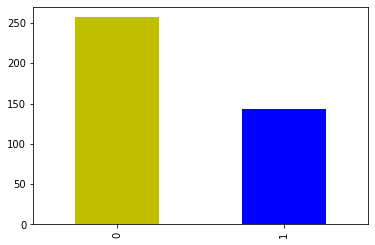

In [8]:
v=df['Purchased'].value_counts()
v.plot(kind="bar",color=['y','b'])
v

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [13]:
#split the data into train and test, put the test data to be 30%

In [14]:
from sklearn.model_selection import train_test_split as split
x_train,x_test,y_train,y_test=split(x,y,test_size=0.3,random_state=0)

In [16]:
print(x_train.shape)
print(x_test.shape)

(280, 2)
(120, 2)


In [17]:
from sklearn.linear_model import LogisticRegression as LR
model=LR()

In [18]:
model.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [21]:
#values are not matching with the expected values
#hence we need to normalize the inputs
#to normalize, we will use MinMaxScaler
#we will understand the working of  MinMaxScaler below and then implement it on our code

In [22]:
#normalization
a=np.array([[10],[12],[34],[13],[5]])
a

array([[10],
       [12],
       [34],
       [13],
       [ 5]])

In [23]:
amin=np.min(a)
amax=np.max(a)
anorm=(a-amin)/(amax-amin)

In [24]:
anorm

array([[0.17241379],
       [0.24137931],
       [1.        ],
       [0.27586207],
       [0.        ]])

In [27]:
from sklearn.preprocessing import MinMaxScaler as Sc
scaler1=Sc()
z=scaler1.fit_transform(a)
z

array([[0.17241379],
       [0.24137931],
       [1.        ],
       [0.27586207],
       [0.        ]])

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [30]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [31]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [33]:
accuracy_score(y_pred,y_test)

0.8416666666666667

In [34]:
confusion_matrix(y_pred,y_test)

array([[76, 16],
       [ 3, 25]])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        79
           1       0.89      0.61      0.72        41

    accuracy                           0.84       120
   macro avg       0.86      0.79      0.81       120
weighted avg       0.85      0.84      0.83       120

